<a href="https://colab.research.google.com/github/Madeira-International-Workshop-in-ML/2023_project/blob/solution/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, roc_curve, auc, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVC
from itertools import combinations

#Load and examine the data

In [ ]:
#penguin dataset
penguins = pd.read_csv('https://raw.githubusercontent.com/remijul/dataset/master/penguins_size.csv')
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


The dataset consists of 7 columns:
1.   species: penguin species (Chinstrap, Adélie, or Gentoo)
2.   island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
3.   culmen_length_mm: culmen length (mm)
4.   culmen_depth_mm: culmen depth (mm)
5.   flipper_length_mm: flipper length (mm)
6.   body_mass_g: body mass (g)
7.   sex: penguin sex


In [ ]:
#print the dataset
penguins

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
3    Adelie  Torgersen               NaN              NaN                NaN   
4    Adelie  Torgersen              36.7             19.3              193.0   
..      ...        ...               ...              ...                ...   
339  Gentoo     Biscoe               NaN              NaN                NaN   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
3            NaN     NaN  
4         3450.0  FEMALE  
..           ...     ...  
339          NaN     NaN  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  

[344 rows x 7 columns]

In [ ]:
#show dataset statistics
penguins.describe(include='all')

species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
count      344     344        342.000000       342.000000         342.000000   
unique       3       3               NaN              NaN                NaN   
top     Adelie  Biscoe               NaN              NaN                NaN   
freq       152     168               NaN              NaN                NaN   
mean       NaN     NaN         43.921930        17.151170         200.915205   
std        NaN     NaN          5.459584         1.974793          14.061714   
min        NaN     NaN         32.100000        13.100000         172.000000   
25%        NaN     NaN         39.225000        15.600000         190.000000   
50%        NaN     NaN         44.450000        17.300000         197.000000   
75%        NaN     NaN         48.500000        18.700000         213.000000   
max        NaN     NaN         59.600000        21.500000         231.000000   

        body_mass_g   sex  
count    342.000000   334  
unique          NaN     3  
top             NaN  MALE  
freq            NaN   168  
mean    4201.754386   NaN  
std      801.954536   NaN  
min     2700.000000   NaN  
25%     3550.000000   NaN  
50%     4050.000000   NaN  
75%     4750.000000   NaN  
max     6300.000000   NaN

In [ ]:
#count the number of entries
penguins['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [ ]:
#remove the NaN
penguins.dropna(how='any', inplace=True)

In [ ]:
#show dataset statistics again
penguins.describe(include='all')

species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
count      334     334        334.000000       334.000000         334.000000   
unique       3       3               NaN              NaN                NaN   
top     Adelie  Biscoe               NaN              NaN                NaN   
freq       146     164               NaN              NaN                NaN   
mean       NaN     NaN         43.994311        17.160479         201.014970   
std        NaN     NaN          5.460521         1.967909          14.022175   
min        NaN     NaN         32.100000        13.100000         172.000000   
25%        NaN     NaN         39.500000        15.600000         190.000000   
50%        NaN     NaN         44.500000        17.300000         197.000000   
75%        NaN     NaN         48.575000        18.700000         213.000000   
max        NaN     NaN         59.600000        21.500000         231.000000   

        body_mass_g   sex  
count    334.000000   334  
unique          NaN     3  
top             NaN  MALE  
freq            NaN   168  
mean    4209.056886   NaN  
std      804.836129   NaN  
min     2700.000000   NaN  
25%     3550.000000   NaN  
50%     4050.000000   NaN  
75%     4793.750000   NaN  
max     6300.000000   NaN

In [ ]:
#count again the number of entries
penguins['species'].value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64

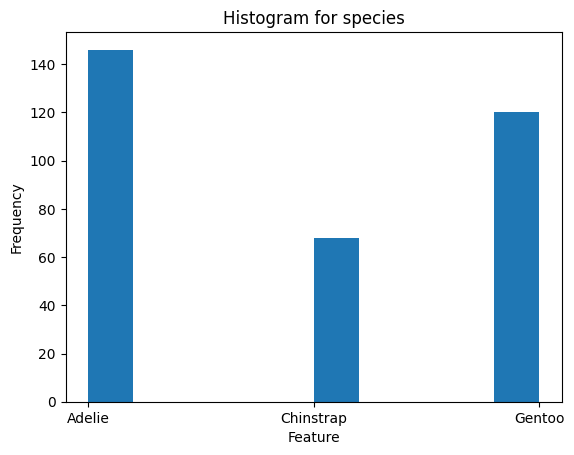

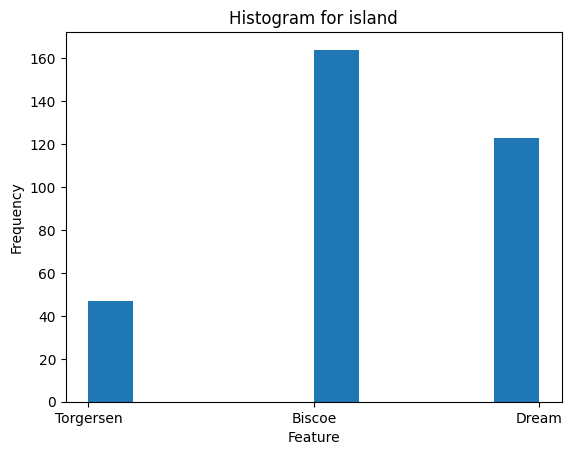

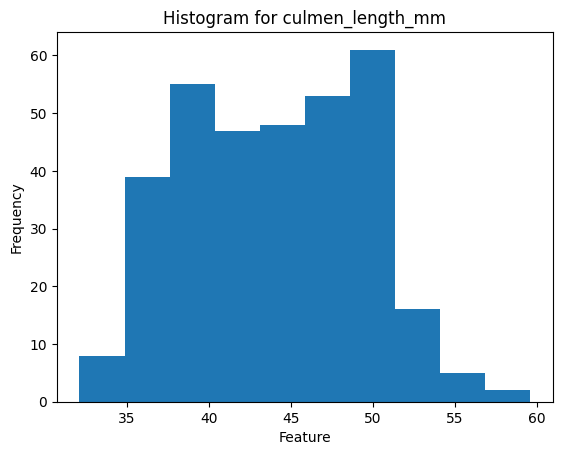

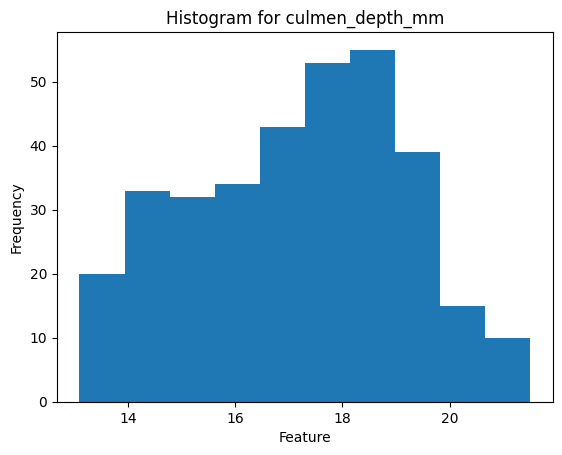

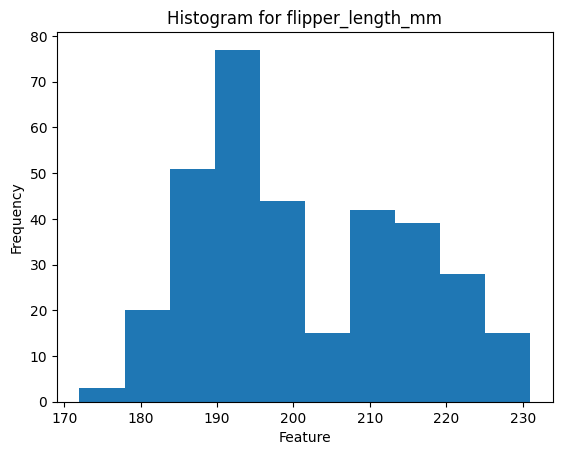

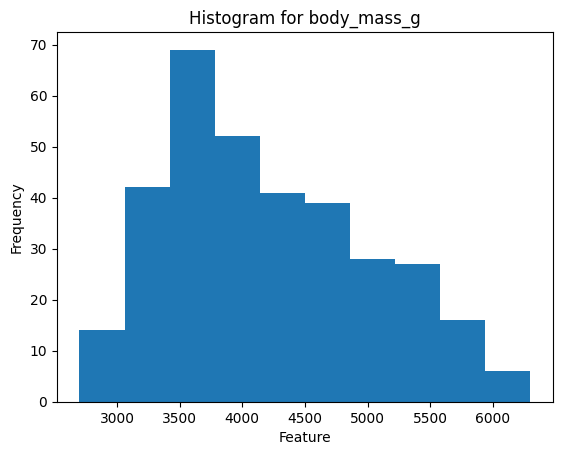

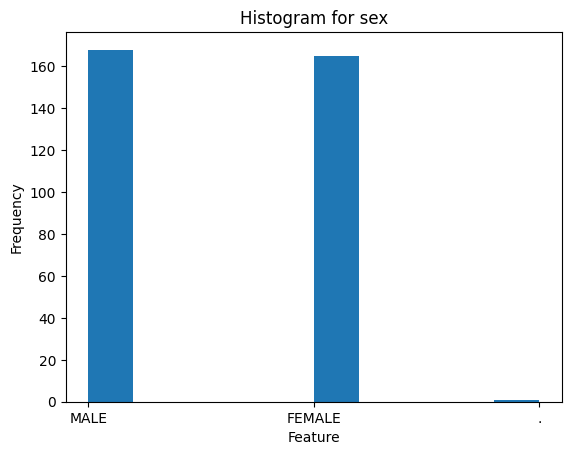

In [ ]:
#create an individual histogram for each column
for column in penguins.columns:
    plt.figure()
    plt.hist(penguins[column], bins=10)
    plt.xlabel('Feature')
    plt.ylabel('Frequency')
    plt.title(f'Histogram for {column}')
plt.show()

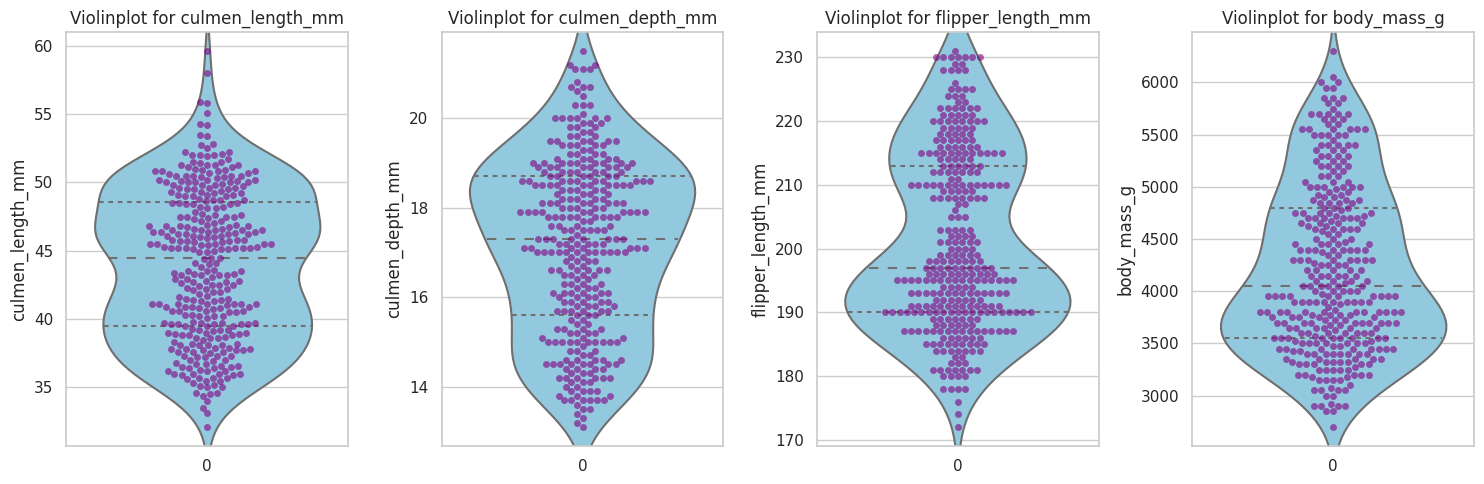

In [ ]:
#filter for numeric columns only
penguins_numeric_columns = penguins.select_dtypes(include=['number'])
#set the Seaborn theme globally
sns.set_theme(style="whitegrid")
#create a grid of subplots
fig, axes = plt.subplots(1, len(penguins_numeric_columns.columns), figsize=(15, 5))
#loop through each numeric column and create a violinplot plot in a subplot
for i, column in enumerate(penguins_numeric_columns.columns):
    sns.violinplot(data=penguins_numeric_columns[column], color="skyblue", inner="quart", ax=axes[i])
    sns.swarmplot(data=penguins_numeric_columns[column], color="purple", alpha=0.6, ax=axes[i])
    axes[i].set_title(f'Violinplot for {column}')
#ensure subplots don't overlap
plt.tight_layout()
plt.show()

#Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


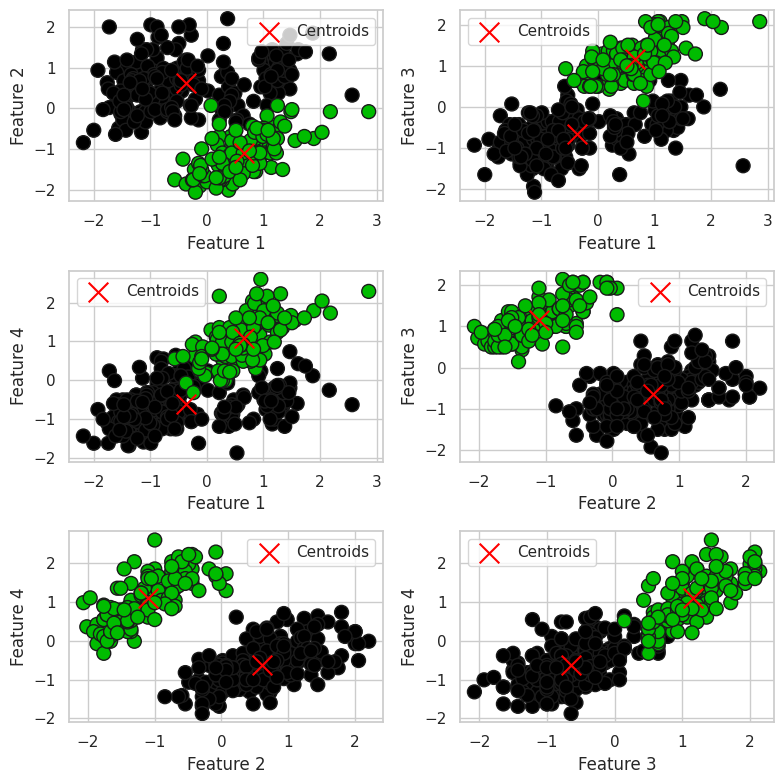

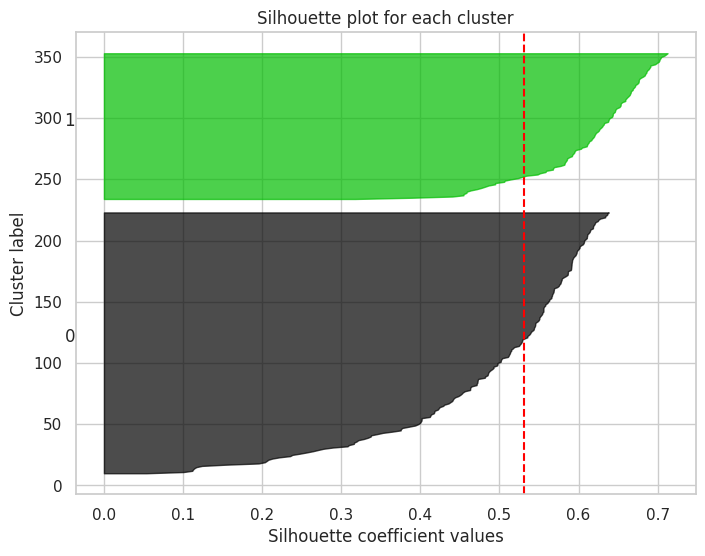

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


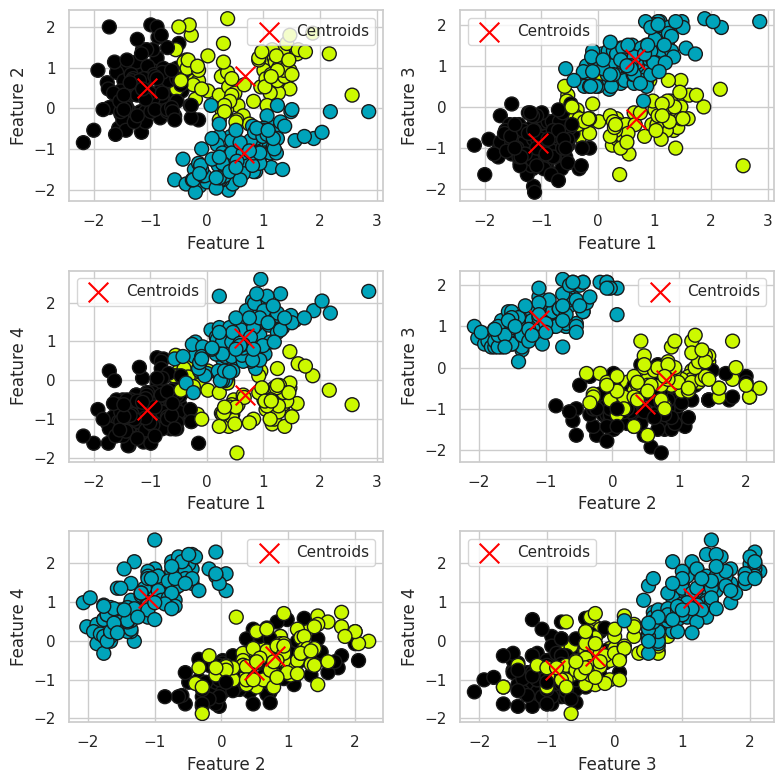

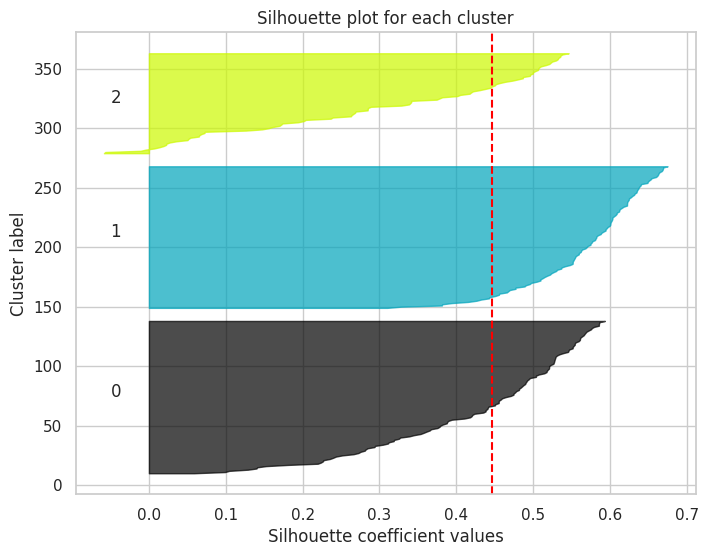

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


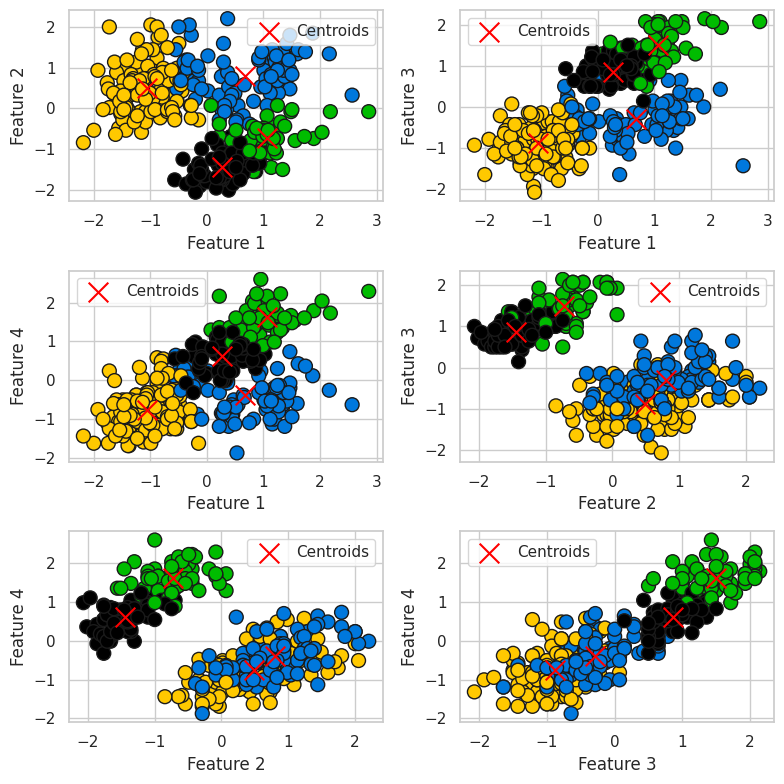

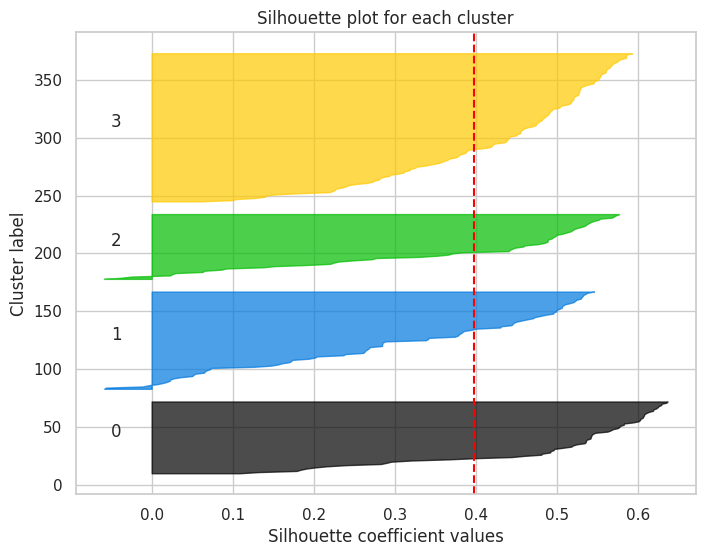

In [ ]:
#scale penguins_numeric_columns with StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(penguins_numeric_columns)

#apply k-means clustering to the scaled data, check with 2, 3 and 4 clusters
#plot the k-means clusters and bellow the silhouette plot for each cluster
for n_clusters in range (2, 5):
  kmeans = KMeans(n_clusters=n_clusters, random_state=42)
  cluster_labels = kmeans.fit_predict(X_scaled)
  #get all combinations of 2 features from the dataset
  feature_combinations = list(combinations(range(X_scaled.shape[1]), 2))
  #create subplots for all feature combinations
  fig, axes = plt.subplots(len(feature_combinations) // 2, 2, figsize=(8, 8))
  axes = axes.ravel()
  for i, (feature1, feature2) in enumerate(feature_combinations):
      ax = axes[i]
      #plot the clustering regions in 2D for the current feature pair
      colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
      ax.scatter(
          X_scaled[:, feature1], X_scaled[:, feature2],
          marker='o', s=100, c=colors, edgecolor='k'
      )
      #plot the centroids of each cluster
      cluster_centers = kmeans.cluster_centers_
      ax.scatter(
          cluster_centers[:, feature1], cluster_centers[:, feature2],
          marker='x', s=200, c='red', label='Centroids'
      )
      ax.set_xlabel(f'Feature {feature1 + 1}')
      ax.set_ylabel(f'Feature {feature2 + 1}')
      ax.legend()
  #adjust and show the subplots for the k-means
  plt.tight_layout()
  plt.show()

  #silhouette scores for each sample
  silhouette_avg = silhouette_score(X_scaled, cluster_labels)
  #silhouette plot for each cluster
  plt.figure(figsize=(8, 6))
  sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)
  y_lower = 10
  for i in range(n_clusters):
      ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
      ith_cluster_silhouette_values.sort()
      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i
      color = cm.nipy_spectral(float(i) / n_clusters)
      plt.fill_betweenx(np.arange(y_lower, y_upper), 0,
                        ith_cluster_silhouette_values, facecolor=color,
                        edgecolor=color, alpha=0.7)
      plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      y_lower = y_upper + 10
  plt.axvline(x=silhouette_avg, color="red", linestyle="--")
  plt.title("Silhouette plot for each cluster")
  plt.xlabel("Silhouette coefficient values")
  plt.ylabel("Cluster label")
  plt.show()

#Classification

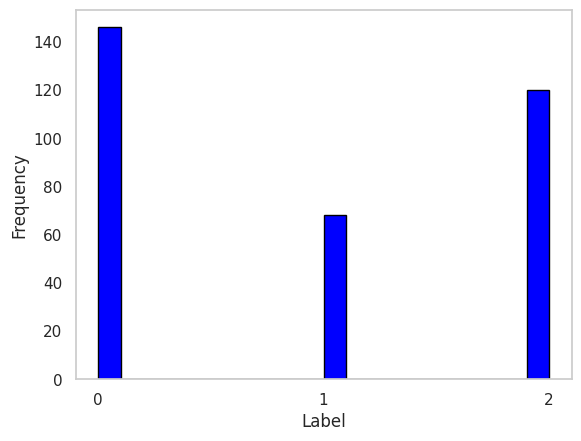

In [ ]:
#convert the labels to integer values
lb = LabelEncoder()
y = lb.fit_transform(penguins['species'])
#examine the histogram of the labels
plt.hist(y, bins=20, color='blue', edgecolor='black')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks([0, 1, 2])
plt.grid()
plt.show()

In [ ]:
#define the scaled penguins_numeric_columns data as input features
X = X_scaled #features
#split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
#instantiate a logistic regression model (using default parameters with maximum of 1000 runs)
logreg = LogisticRegression(max_iter=1000)
#fit the model with data
logreg.fit(X_train,y_train)
#make predictions on the testing set
y_pred=logreg.predict(X_test)

In [ ]:
#perform model evaluation using macro averages
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='macro'))

[[42  0  0]
 [ 3 13  0]
 [ 0  0 26]]
Accuracy: 0.9642857142857143
Precision: 0.9777777777777779
Recall: 0.9375


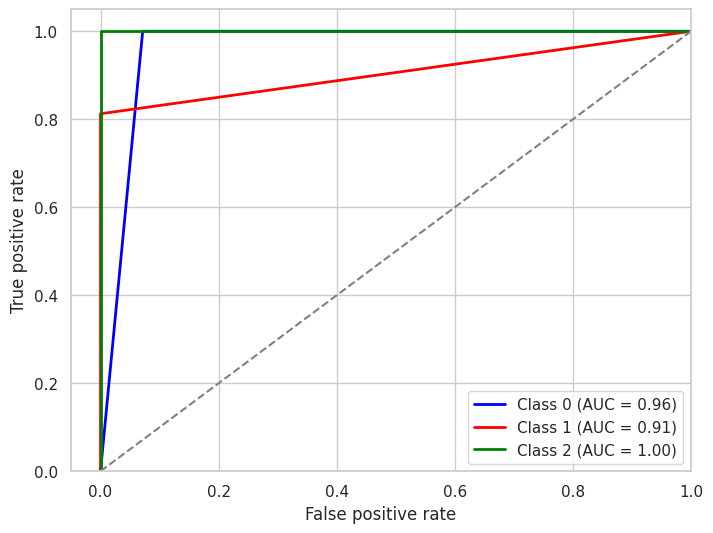

Class 0 AUC: 0.96
Class 1 AUC: 0.91
Class 2 AUC: 1.00


In [ ]:
#convert the labels to one-hot-encoding
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])

#define the number of classes
n_classes = 3

#initialize an empty dictionary to store ROC curves and AUC values for each class, and then fill it in a loop
roc_curves = {}
auc_values = {}
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_curves[i] = (fpr, tpr)
    auc_values[i] = auc(fpr, tpr)

#plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i in range(n_classes):
    fpr, tpr = roc_curves[i]
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'Class {i} (AUC = {auc_values[i]:.2f})')
#plot the random guess line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()

#print AUC values for each class
for i in range(n_classes):
    print(f'Class {i} AUC: {auc_values[i]:.2f}')

#Add noise to the data

In [ ]:
#data without noise
penguins_numeric_columns

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0                39.1             18.7              181.0       3750.0
1                39.5             17.4              186.0       3800.0
2                40.3             18.0              195.0       3250.0
4                36.7             19.3              193.0       3450.0
5                39.3             20.6              190.0       3650.0
..                ...              ...                ...          ...
338              47.2             13.7              214.0       4925.0
340              46.8             14.3              215.0       4850.0
341              50.4             15.7              222.0       5750.0
342              45.2             14.8              212.0       5200.0
343              49.9             16.1              213.0       5400.0

[334 rows x 4 columns]

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(penguins_numeric_columns, *['culmen_length_mm'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(penguins_numeric_columns, *['culmen_depth_mm'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(penguins_numeric_columns, *['flipper_length_mm'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(penguins_numeric_columns, *['body_mass_g'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(penguins_numeric_columns, *['culmen_length_mm'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(penguins_numeric_columns, *['culmen_depth_mm'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(penguins_numeric_columns, *['flipper_length_mm'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(penguins_numeric_columns, *['body_mass_g'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(penguins_numeric_columns, *[[['culmen_length_mm', 'culmen_depth_mm'], ['culmen_depth_mm', 'flipper_length_mm'], ['flipper_length_mm', 'body_mass_g']]], **{})
chart

In [ ]:
#define the standard deviation of the noise
std_dev = 10
#get the number of rows and columns in the DataFrame
num_rows, num_columns = penguins_numeric_columns.shape
#generate AWGN with the same shape as the DataFrame
noise = np.random.normal(0, std_dev, (num_rows, num_columns))
#add the noise to the DataFrame
penguins_with_noise = penguins_numeric_columns + noise
#replace negative values with zero so that the data is non-negative
penguins_with_noise[penguins_with_noise < 0] = 0
penguins_with_noise

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0           31.189678        26.468074         168.501347  3727.778248
1           37.683601         6.372997         179.887355  3798.066213
2           26.005618        29.086852         200.888527  3250.886262
4           28.235259        28.524776         198.102887  3452.810813
5           52.010162        30.984255         189.995170  3635.838570
..                ...              ...                ...          ...
338         50.293165        25.740441         229.238217  4925.930407
340         40.434416         9.760532         213.180942  4848.471411
341         28.097637        16.279843         234.505540  5763.657450
342         56.963225        18.927760         203.757793  5199.958593
343         53.065310        15.493704         191.578508  5414.783125

[334 rows x 4 columns]

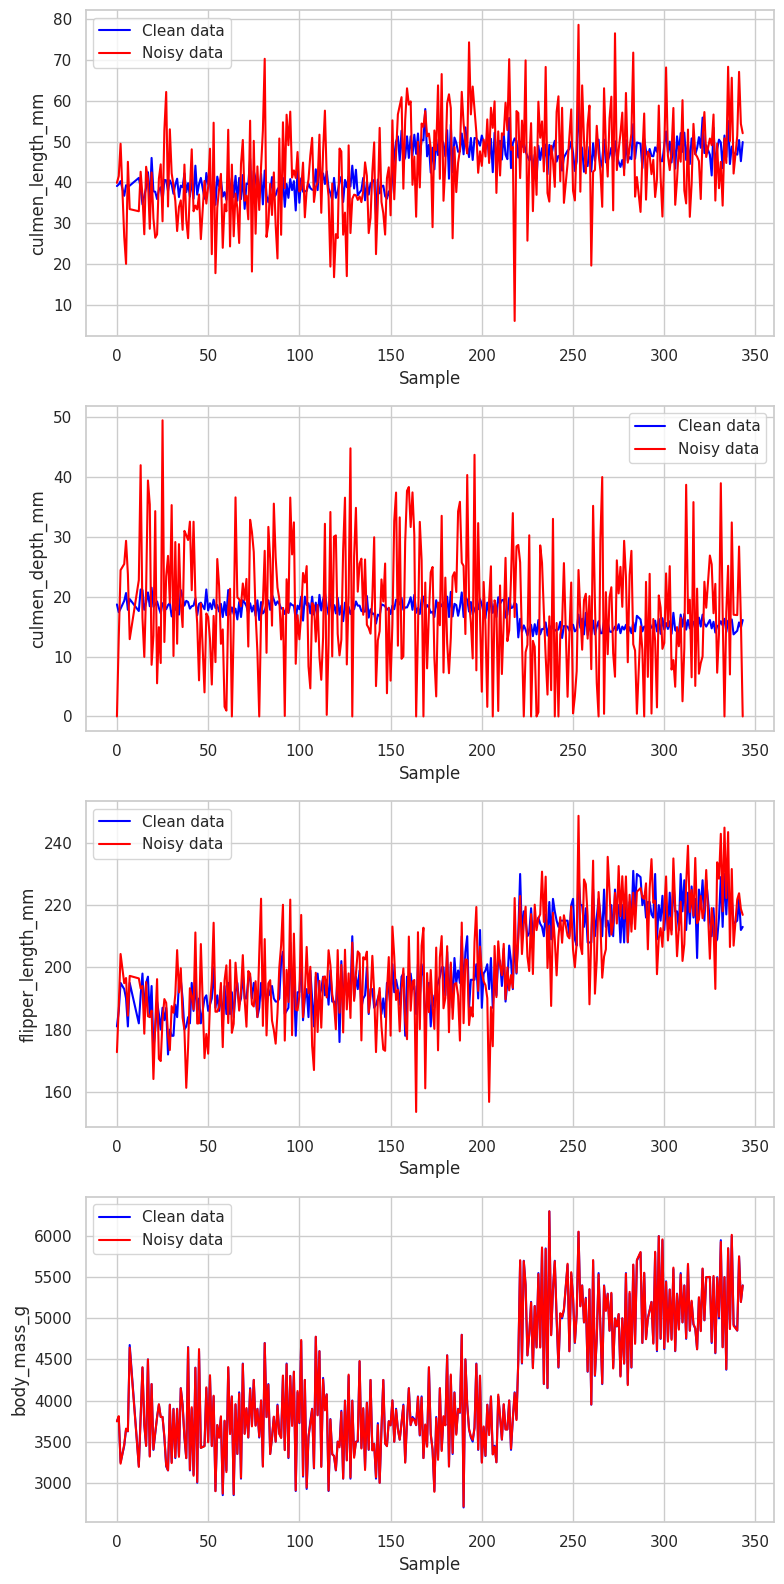

In [ ]:
#plot the clean and noisy data
#create subplots for each column
num_columns = penguins_numeric_columns.shape[1]
fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(8, 4 * num_columns))

#loop through each column and create line plots
for i, column in enumerate(penguins_numeric_columns.columns):
    ax = axes[i]
    #plot the clean data
    ax.plot(penguins_numeric_columns.index, penguins_numeric_columns[column], label='Clean data', color='blue')
    #plot the noisy data
    ax.plot(penguins_with_noise.index, penguins_with_noise[column], label='Noisy data', color='red')
    ax.set_xlabel('Sample')
    ax.set_ylabel(column)
    ax.legend()
plt.tight_layout()
plt.show()

#Redo clustering and classification with the noisy data



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


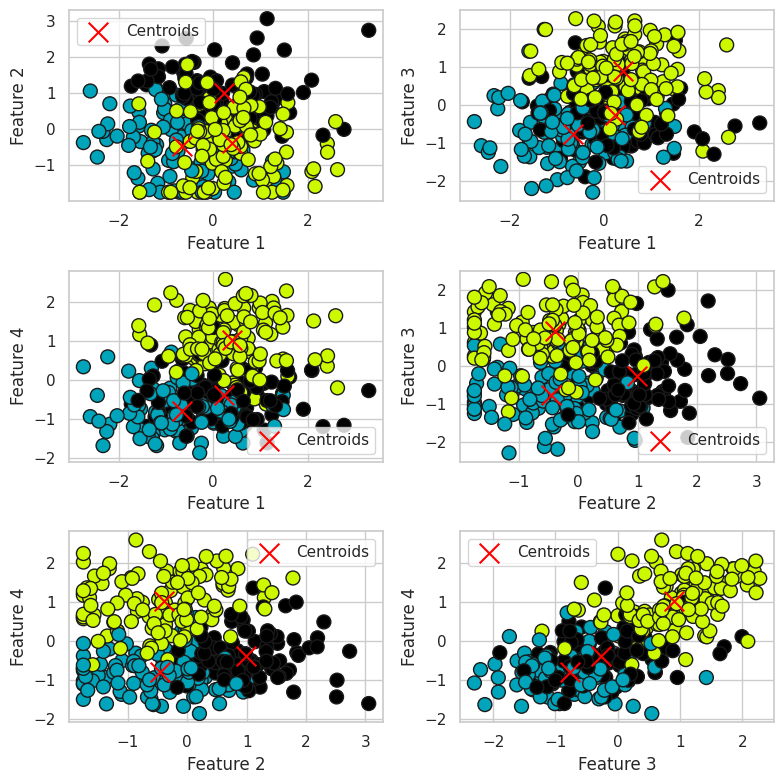

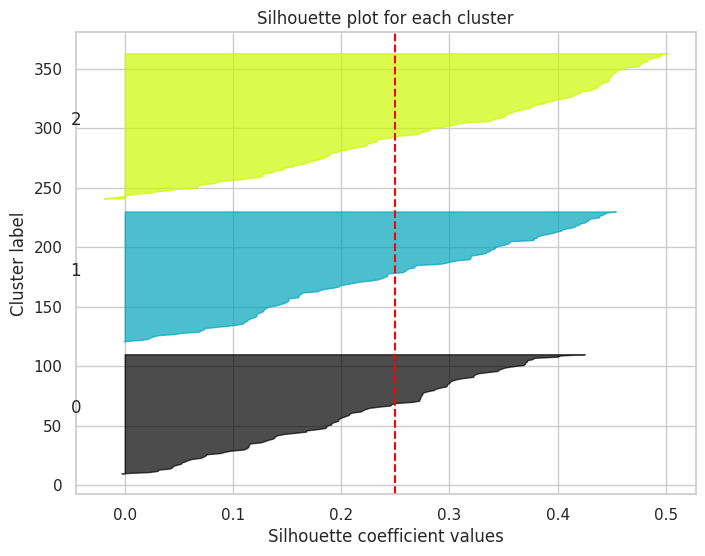

In [ ]:
#clustering the noisy data with 3 classes
X_scaled = scaler.fit_transform(penguins_with_noise)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
feature_combinations = list(combinations(range(X_scaled.shape[1]), 2))
fig, axes = plt.subplots(len(feature_combinations) // 2, 2, figsize=(8, 8))
axes = axes.ravel()
for i, (feature1, feature2) in enumerate(feature_combinations):
    ax = axes[i]
    colors = cm.nipy_spectral(cluster_labels.astype(float) / 3)
    ax.scatter(
        X_scaled[:, feature1], X_scaled[:, feature2],
        marker='o', s=100, c=colors, edgecolor='k'
    )
    cluster_centers = kmeans.cluster_centers_
    ax.scatter(
        cluster_centers[:, feature1], cluster_centers[:, feature2],
        marker='x', s=200, c='red', label='Centroids'
    )
    ax.set_xlabel(f'Feature {feature1 + 1}')
    ax.set_ylabel(f'Feature {feature2 + 1}')
    ax.legend()
plt.tight_layout()
plt.show()
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
plt.figure(figsize=(8, 6))
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)
y_lower = 10
for i in range(3):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / 3)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0,
                      ith_cluster_silhouette_values, facecolor=color,
                      edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Silhouette plot for each cluster")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.show()

[[34  5  3]
 [ 9  7  0]
 [ 1  1 24]]
Accuracy: 0.7738095238095238
Precision: 0.7333592333592334
Recall: 0.7233669108669109


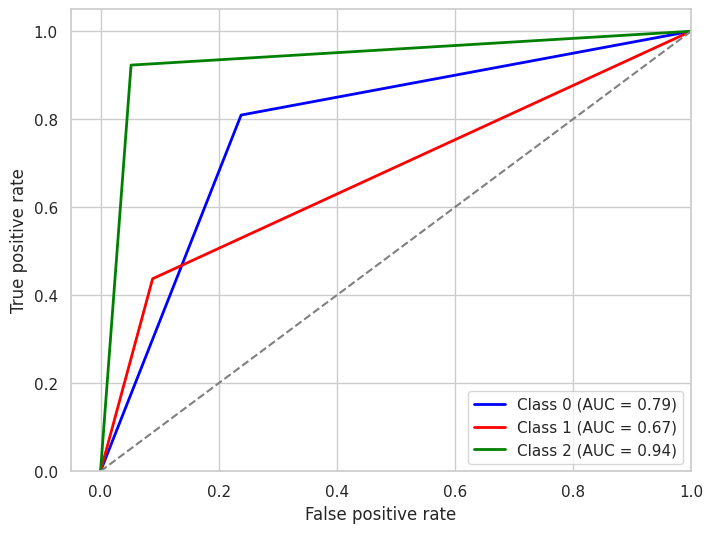

Class 0 AUC: 0.79
Class 1 AUC: 0.67
Class 2 AUC: 0.94


In [ ]:
#classification with the noisy data using lofistic regressions
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=0)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='macro'))
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])
roc_curves = {}
auc_values = {}
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_curves[i] = (fpr, tpr)
    auc_values[i] = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i in range(n_classes):
    fpr, tpr = roc_curves[i]
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'Class {i} (AUC = {auc_values[i]:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()
for i in range(n_classes):
    print(f'Class {i} AUC: {auc_values[i]:.2f}')

#Classification of noisy data with other models



[[36  4  2]
 [ 8  8  0]
 [ 2  0 24]]
Accuracy: 0.8095238095238095
Precision: 0.7907840951319213
Recall: 0.76007326007326


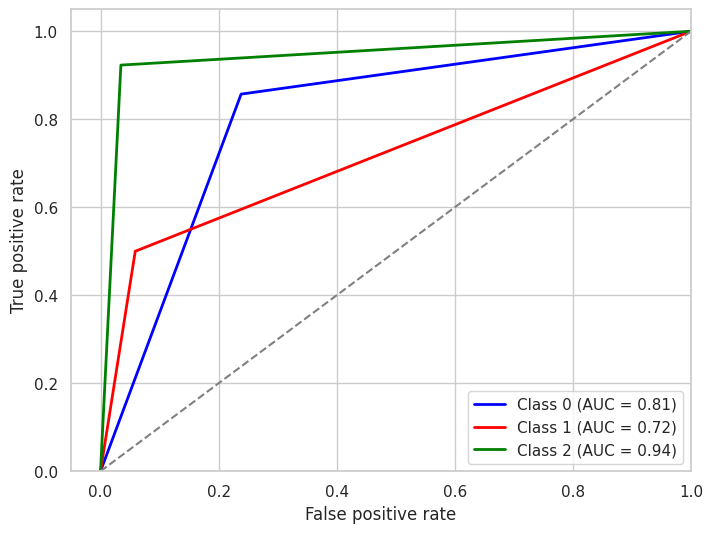

Class 0 AUC: 0.81
Class 1 AUC: 0.72
Class 2 AUC: 0.94


In [ ]:
#using SVM
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='macro'))
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])
roc_curves = {}
auc_values = {}
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_curves[i] = (fpr, tpr)
    auc_values[i] = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i in range(n_classes):
    fpr, tpr = roc_curves[i]
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'Class {i} (AUC = {auc_values[i]:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()
for i in range(n_classes):
    print(f'Class {i} AUC: {auc_values[i]:.2f}')

[[31  8  3]
 [ 6 10  0]
 [ 4  2 20]]
Accuracy: 0.7261904761904762
Precision: 0.7085542594556381
Recall: 0.7107753357753358


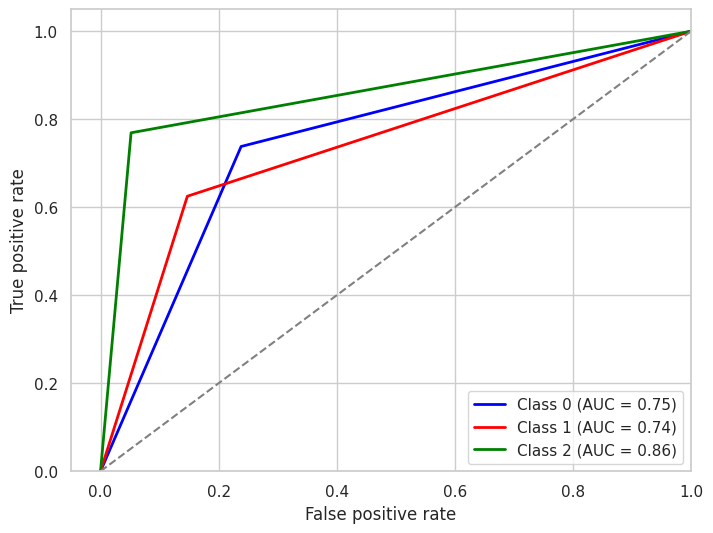

Class 0 AUC: 0.75
Class 1 AUC: 0.74
Class 2 AUC: 0.86


In [ ]:
#using a tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='macro'))
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])
roc_curves = {}
auc_values = {}
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_curves[i] = (fpr, tpr)
    auc_values[i] = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i in range(n_classes):
    fpr, tpr = roc_curves[i]
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'Class {i} (AUC = {auc_values[i]:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()
for i in range(n_classes):
    print(f'Class {i} AUC: {auc_values[i]:.2f}')

[[34  6  2]
 [ 9  7  0]
 [ 2  1 23]]
Accuracy: 0.7619047619047619
Precision: 0.7251851851851852
Recall: 0.7105463980463981


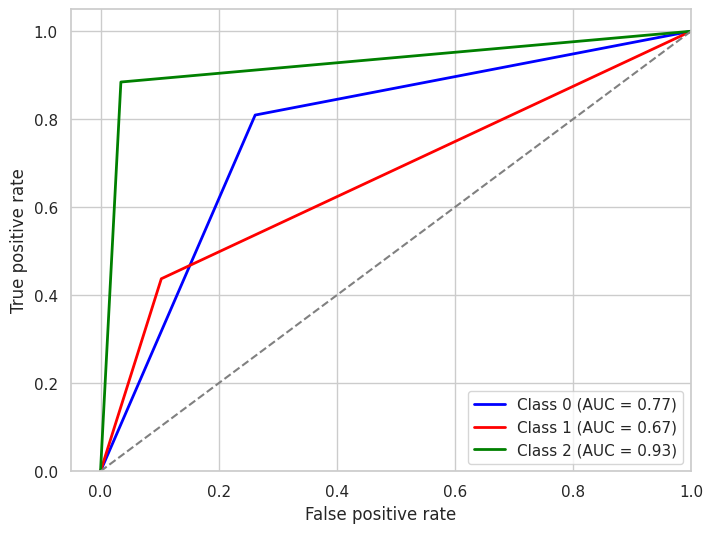

Class 0 AUC: 0.77
Class 1 AUC: 0.67
Class 2 AUC: 0.93


In [ ]:
#using kNN
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='macro'))
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])
roc_curves = {}
auc_values = {}
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_curves[i] = (fpr, tpr)
    auc_values[i] = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i in range(n_classes):
    fpr, tpr = roc_curves[i]
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'Class {i} (AUC = {auc_values[i]:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()
for i in range(n_classes):
    print(f'Class {i} AUC: {auc_values[i]:.2f}')

Text(0, 0.5, 'Mean Error')

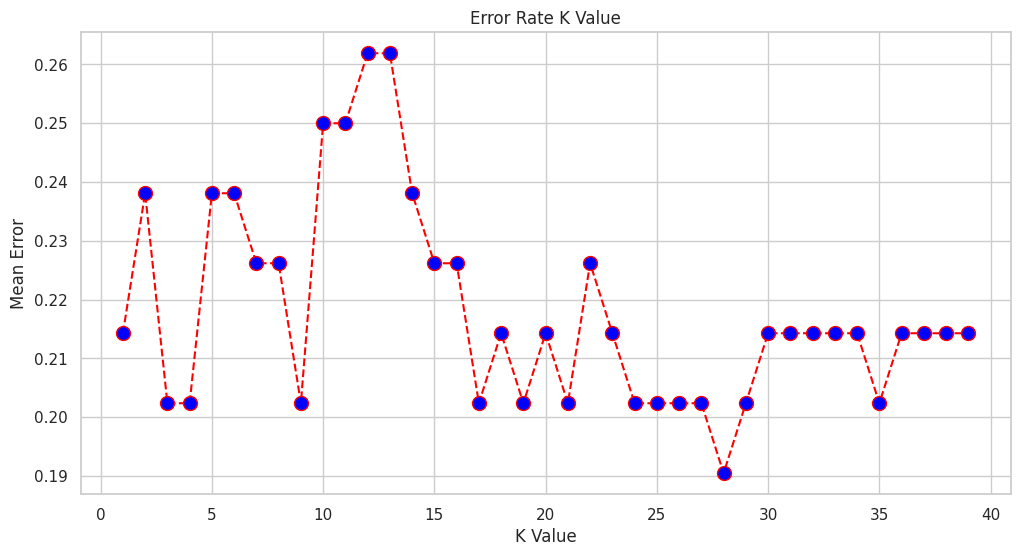

In [ ]:
#search for the optimal k to use in kNN
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

[[39  1  2]
 [11  4  1]
 [ 1  0 25]]
Accuracy: 0.8095238095238095
Precision: 0.8191876750700281
Recall: 0.7133699633699634


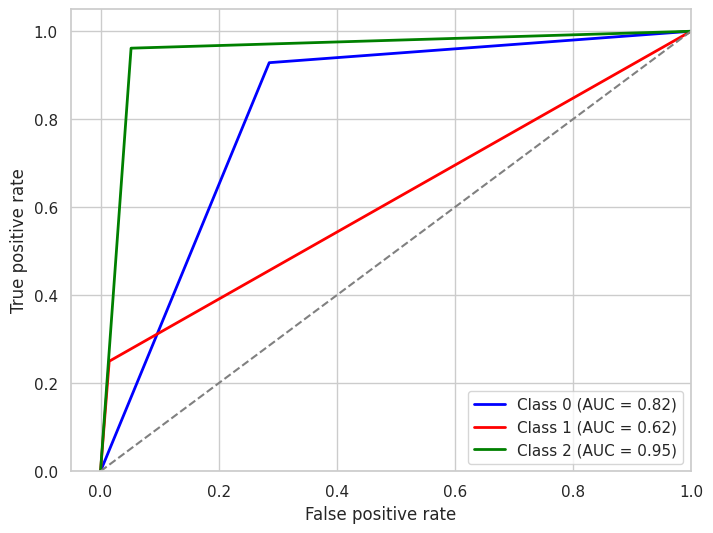

Class 0 AUC: 0.82
Class 1 AUC: 0.62
Class 2 AUC: 0.95


In [ ]:
#using kNN with optimal k
classifier = KNeighborsClassifier(n_neighbors=28)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='macro'))
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])
roc_curves = {}
auc_values = {}
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_curves[i] = (fpr, tpr)
    auc_values[i] = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i in range(n_classes):
    fpr, tpr = roc_curves[i]
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'Class {i} (AUC = {auc_values[i]:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()
for i in range(n_classes):
    print(f'Class {i} AUC: {auc_values[i]:.2f}')

#Regression

In [ ]:
#Use the three first columns of penguins_with_noise dataframe (culmen_length_mm,
#culmen_depth_mm,	and flipper_length_mm) now in X_scaled to forecast the fourth	(body_mass_g)
X = X_scaled[:,:3]
y = X_scaled[:,3]

In [ ]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#define the neural network model
nn = MLPRegressor(
    activation='relu',
    hidden_layer_sizes=(1000),
    alpha=0.01,
    early_stopping=True
)
#train the model
nn.fit(X_train, y_train)

MLPRegressor(alpha=0.01, early_stopping=True, hidden_layer_sizes=1000)

Rsquared value:  0.6040106710639076
RMSE:  0.5773469211553782


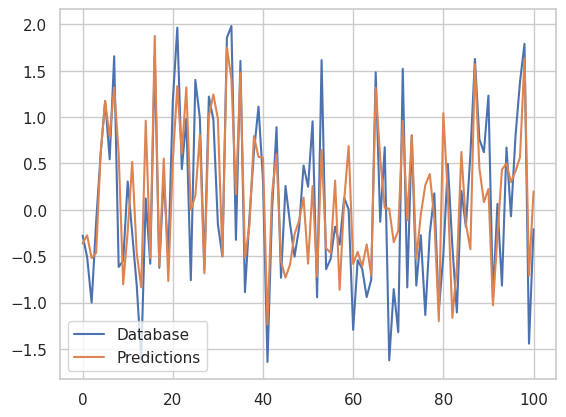

In [ ]:
#make predictions and estimate the error
pred = nn.predict(X_test)
test_set_rsquared = nn.score(X_test, y_test)
test_set_rmse = np.sqrt(mean_squared_error(y_test, pred))
print('Rsquared value: ', test_set_rsquared)
print('RMSE: ', test_set_rmse)
#plot the predictions
plt.plot(y_test, label = "Database")
plt.plot(pred, label = "Predictions")
plt.legend()
plt.show()

Rsquared value:  -0.001394653615204744
RMSE:  0.9762697077669228


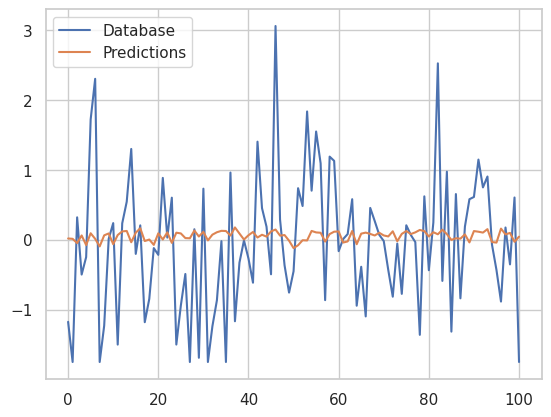

In [ ]:
#Use the first, third, and fourth columns of penguins_with_noise dataframe
#now in X_scaled to forecast the second	column
X = X_scaled[:, [0, 2, 3]]
y = X_scaled[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
nn = MLPRegressor(
    activation='relu',
    hidden_layer_sizes=(1000),
    alpha=0.01,
    early_stopping=True
)
nn.fit(X_train, y_train)
pred = nn.predict(X_test)
test_set_rsquared = nn.score(X_test, y_test)
test_set_rmse = np.sqrt(mean_squared_error(y_test, pred))
print('Rsquared value: ', test_set_rsquared)
print('RMSE: ', test_set_rmse)
plt.plot(y_test, label = "Database")
plt.plot(pred, label = "Predictions")
plt.legend()
plt.show()

Rsquared value:  0.5206070274675954
RMSE:  0.7822907026564799


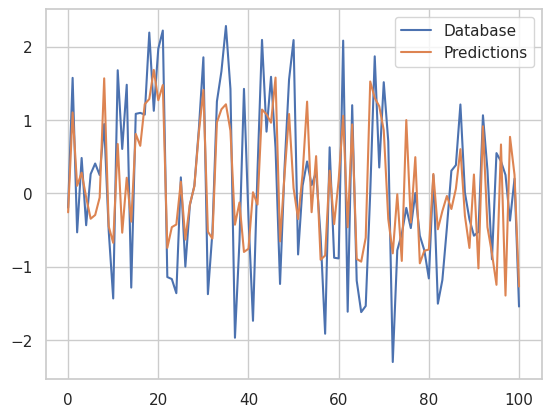

In [ ]:
#Use the first, second, and fourth columns of penguins_with_noise dataframe
#now in X_scaled to forecast the third column
X = X_scaled[:, [0, 1, 3]]
y = X_scaled[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
nn = MLPRegressor(
    activation='relu',
    hidden_layer_sizes=(1000),
    alpha=0.01,
    early_stopping=True
)
nn.fit(X_train, y_train)
pred = nn.predict(X_test)
test_set_rsquared = nn.score(X_test, y_test)
test_set_rmse = np.sqrt(mean_squared_error(y_test, pred))
print('Rsquared value: ', test_set_rsquared)
print('RMSE: ', test_set_rmse)
plt.plot(y_test, label = "Database")
plt.plot(pred, label = "Predictions")
plt.legend()
plt.show()

Rsquared value:  0.7722681453987161
RMSE:  0.4472597184969081


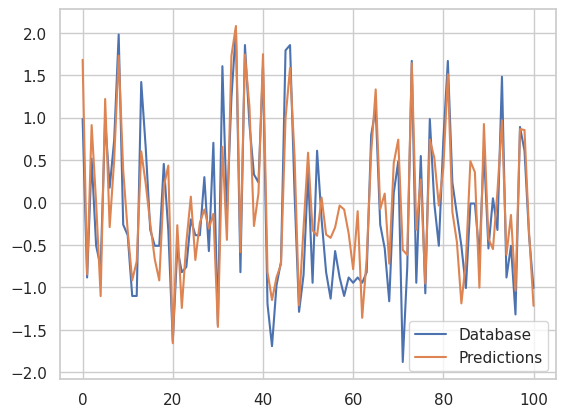

Rsquared value:  0.4421717337691816
RMSE:  0.7670796075910264


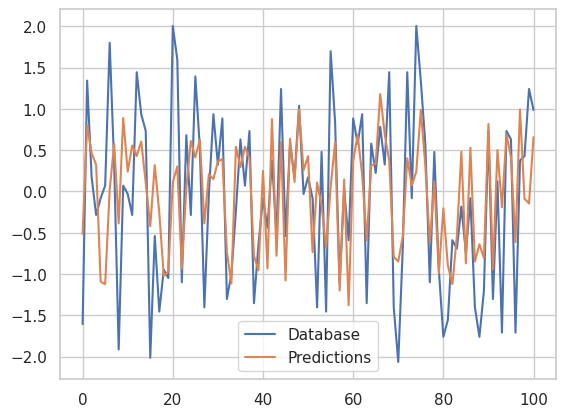

Rsquared value:  0.7447774676999397
RMSE:  0.46444569760550003


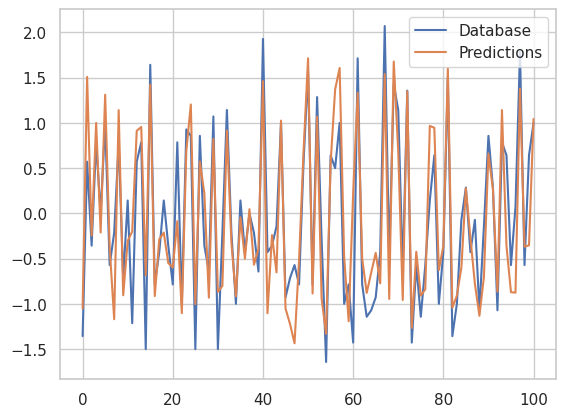

In [ ]:
#repeat the regression exercises but using the original data (without noise)
#forecast column 4
X_scaled = scaler.fit_transform(penguins_numeric_columns)
X = X_scaled[:,:3]
y = X_scaled[:,3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
nn = MLPRegressor(
    activation='relu',
    hidden_layer_sizes=(1000),
    alpha=0.01,
    early_stopping=True
)
nn.fit(X_train, y_train)
pred = nn.predict(X_test)
test_set_rsquared = nn.score(X_test, y_test)
test_set_rmse = np.sqrt(mean_squared_error(y_test, pred))
print('Rsquared value: ', test_set_rsquared)
print('RMSE: ', test_set_rmse)
plt.plot(y_test, label = "Database")
plt.plot(pred, label = "Predictions")
plt.legend()
plt.show()
#forecast column 2
X = X_scaled[:, [0, 2, 3]]
y = X_scaled[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
nn = MLPRegressor(
    activation='relu',
    hidden_layer_sizes=(1000),
    alpha=0.01,
    early_stopping=True
)
nn.fit(X_train, y_train)
pred = nn.predict(X_test)
test_set_rsquared = nn.score(X_test, y_test)
test_set_rmse = np.sqrt(mean_squared_error(y_test, pred))
print('Rsquared value: ', test_set_rsquared)
print('RMSE: ', test_set_rmse)
plt.plot(y_test, label = "Database")
plt.plot(pred, label = "Predictions")
plt.legend()
plt.show()
#forecast column 3
X = X_scaled[:, [0, 1, 3]]
y = X_scaled[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
nn = MLPRegressor(
    activation='relu',
    hidden_layer_sizes=(1000),
    alpha=0.01,
    early_stopping=True
)
nn.fit(X_train, y_train)
pred = nn.predict(X_test)
test_set_rsquared = nn.score(X_test, y_test)
test_set_rmse = np.sqrt(mean_squared_error(y_test, pred))
print('Rsquared value: ', test_set_rsquared)
print('RMSE: ', test_set_rmse)
plt.plot(y_test, label = "Database")
plt.plot(pred, label = "Predictions")
plt.legend()
plt.show()